In [6]:
from google.colab import files
uploaded = files.upload()


Saving True.csv to True.csv
Saving Fake.csv to Fake.csv


In [7]:
import pandas as pd

fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

# Add labels
fake["label"] = 0  # Fake news
true["label"] = 1  # Real news

# Combine both datasets
data = pd.concat([fake, true])
data = data.sample(frac=1).reset_index(drop=True)  # Shuffle

data.head()


,title,text,subject,date,label
0,"FULL SPEECH: Donald Trump Speaks to 20,000 PLU...",Donald Trump is doing exactly the opposite of ...,politics,"Aug 21, 2015",0
1,3 WORKERS At Major Chain Store REFUSE To Make ...,We are witnessing the slow death of political ...,left-news,"Sep 25, 2016",0
2,Senate confirms Trump's pick Zinke as Interior...,WASHINGTON (Reuters) - The Senate on Wednesday...,politicsNews,"March 1, 2017",1
3,This Trump-Loving NRA Sponsor REALLY Loves Tr...,"On Friday, Donald Trump and several of his GOP...",News,"May 19, 2016",0
4,Trump backs waterboarding and 'a lot more' aft...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"March 22, 2016",1


In [8]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Remove punctuation
    text = text.lower()
    return text

# Combine title + content into one text column
data["text"] = data["title"] + " " + data["text"]
data["text"] = data["text"].apply(clean_text)



In [9]:
from sklearn.model_selection import train_test_split

X = data["text"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9858574610244989

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4726
           1       0.98      0.99      0.99      4254

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



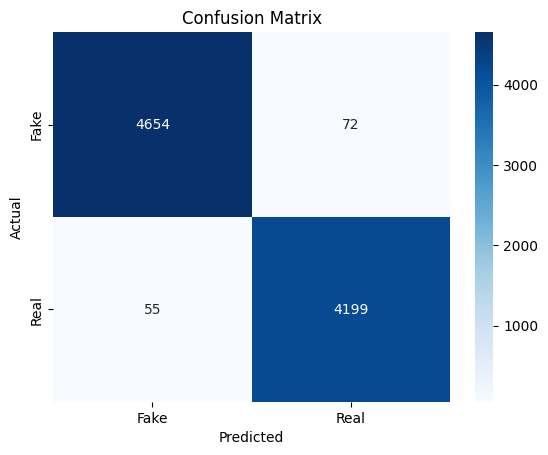

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
